**Data StoryTelling**

El objetivo de este análisis es encontrar patrones en ciertas caracterísiticas (comenzando por Edad, Peso y Atura) de las atletas mujeres que han obtenido algún tipo de medalla en Juegos Olímpicos, información que podría ser de interés para los sponsors que buscan apoyar a las promesas olímpicas. 

Dado que mujeres y hombres participan en forma separada prácticamente en todas las disciplinas y que las variables a estudiar resultan dispares por la condición propia de cada género es que el análisis de divide entre atletas hombres y atletas mujeres. 

En el mismo sentido, dada la multilicidad de disciplinas y la diparidad de condiciones físicas, técnicas y de talento individual o colectivo necesarias para los distintos deportes olímpicos es que se segmetará el estudio también por "Deportes"

Se busca determinar algunas 3 disciplinas individuales para la implementación del modelo. 

🏈 ⚾ 🏉  🎾  🏊 🏀  ⚽


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from bokeh.io import show, output_file
from bokeh.plotting import figure
from bokeh.models import Range1d
pd.set_option ('display.notebook_repr_html', True)
pd.set_option ('display.max_columns', 10)
pd.set_option ('display.max_rows', 10)
%matplotlib inline
import seaborn as sb
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import sklearn 
from scipy.stats import norm
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, RobustScaler, StandardScaler
mpl.rcParams['figure.dpi'] = 400
import graphviz 
from google.colab import drive
import os 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics 
sns.set_style('whitegrid')
drive.mount ('/content/gdrive') 
from statistics import mode
import plotly.express as px
import plotly.graph_objects as go
from matplotlib.gridspec import GridSpec 
!pip install -U ridgeplot
from ridgeplot import ridgeplot

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%cd '//content/gdrive/MyDrive/Coderhouse/Data Science/Entrega 1 - Selección de potenciales Datasets e importe con la librería Pandas/120 años de historia olímpica'

/content/gdrive/MyDrive/Coderhouse/Data Science/Entrega 1 - Selección de potenciales Datasets e importe con la librería Pandas/120 años de historia olímpica


**EDA** 🔍

Se efectúa el análisis exploratorio de datos para conocer y entender el contenido del dataset utilizado.

In [ ]:
!head -10 athlete_events.csv

"ID","Name","Sex","Age","Height","Weight","Team","NOC","Games","Year","Season","City","Sport","Event","Medal"
"1","A Dijiang","M",24,180,80,"China","CHN","1992 Summer",1992,"Summer","Barcelona","Basketball","Basketball Men's Basketball",NA
"2","A Lamusi","M",23,170,60,"China","CHN","2012 Summer",2012,"Summer","London","Judo","Judo Men's Extra-Lightweight",NA
"3","Gunnar Nielsen Aaby","M",24,NA,NA,"Denmark","DEN","1920 Summer",1920,"Summer","Antwerpen","Football","Football Men's Football",NA
"4","Edgar Lindenau Aabye","M",34,NA,NA,"Denmark/Sweden","DEN","1900 Summer",1900,"Summer","Paris","Tug-Of-War","Tug-Of-War Men's Tug-Of-War","Gold"
"5","Christine Jacoba Aaftink","F",21,185,82,"Netherlands","NED","1988 Winter",1988,"Winter","Calgary","Speed Skating","Speed Skating Women's 500 metres",NA
"5","Christine Jacoba Aaftink","F",21,185,82,"Netherlands","NED","1988 Winter",1988,"Winter","Calgary","Speed Skating","Speed Skating Women's 1,000 metres",NA
"5","Christine Jacoba Aaftink","F",25,1

In [ ]:
df_atletas= pd.read_csv('athlete_events.csv',sep=',') #creación del dataframe
df_atletas[['Name','Sex', 'Age']].head() # visualiación del dataframe

Name Sex   Age
0                 A Dijiang   M  24.0
1                  A Lamusi   M  23.0
2       Gunnar Nielsen Aaby   M  24.0
3      Edgar Lindenau Aabye   M  34.0
4  Christine Jacoba Aaftink   F  21.0

In [ ]:
df_atletas.shape # filas y columnas

(271116, 15)

**División del dataframe original en 2 subconjuntos en función del género de los atletas** 👩 👨

In [ ]:
df_M=df_atletas[df_atletas.Sex == "F" ] # dataframe para atletas Mujeres
df_H=df_atletas[df_atletas.Sex == "M" ] # dataframe para atletas Hombres

In [ ]:
df_M.shape # filas y columnas de dataframe de mujeres atletas

(74522, 15)

In [ ]:
print(df_M.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74522 entries, 4 to 271110
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      74522 non-null  int64  
 1   Name    74522 non-null  object 
 2   Sex     74522 non-null  object 
 3   Age     74098 non-null  float64
 4   Height  67378 non-null  float64
 5   Weight  66771 non-null  float64
 6   Team    74522 non-null  object 
 7   NOC     74522 non-null  object 
 8   Games   74522 non-null  object 
 9   Year    74522 non-null  int64  
 10  Season  74522 non-null  object 
 11  City    74522 non-null  object 
 12  Sport   74522 non-null  object 
 13  Event   74522 non-null  object 
 14  Medal   11253 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 9.1+ MB
None


**1 - Limpieza de Datos** 🧹

Vemos que las columnas "Height", "Weight" y "Age" tienen valores nulos. Luego analizaremos la conveniencia de reemplazarlos por otro valor. para la columna "Medal" es factible de tener valores nulos en la mayoría de los registros dados que muestra los atletas que no obtuvieron medallas.

a) En la columna "Medal" se eliminan los valores NA  porque centraremos el análisis en las características de las atletas que obtuvieron algún tipo de medalla sin importar el color. Se crea un dataframe sólo con los registros de las atletas que obtuvieron medallas.

In [ ]:
df_M_Medallas = df_M.dropna(subset = ['Medal'])
df_M_Medallas

ID                                     Name Sex   Age  Height  \
79          21                Ragnhild Margrethe Aamodt   F  27.0   163.0   
91          29                     Willemien Aardenburg   F  22.0     NaN   
105         37                       Ann Kristin Aarnes   F  23.0   182.0   
161         65                        Patimat Abakarova   F  21.0   165.0   
163         67  Mariya Vasilyevna Abakumova (-Tarabina)   F  22.0   179.0   
...        ...                                      ...  ..   ...     ...   
271076  135553      Galina Ivanovna Zybina (-Fyodorova)   F  21.0   168.0   
271078  135553      Galina Ivanovna Zybina (-Fyodorova)   F  25.0   168.0   
271080  135553      Galina Ivanovna Zybina (-Fyodorova)   F  33.0   168.0   
271102  135563                Olesya Nikolayevna Zykina   F  19.0   171.0   
271103  135563                Olesya Nikolayevna Zykina   F  23.0   171.0   

        ...  Season            City      Sport  \
79      ...  Summer         Beijing   Handball   
91      ...  Summer           Seoul     Hockey   
105     ...  Summer         Atlanta   Football   
161     ...  Summer  Rio de Janeiro  Taekwondo   
163     ...  Summer         Beijing  Athletics   
...     ...     ...             ...        ...   
271076  ...  Summer        Helsinki  Athletics   
271078  ...  Summer       Melbourne  Athletics   
271080  ...  Summer           Tokyo  Athletics   
271102  ...  Summer          Sydney  Athletics   
271103  ...  Summer          Athina  Athletics   

                                         Event   Medal  
79                   Handball Women's Handball    Gold  
91                       Hockey Women's Hockey  Bronze  
105                  Football Women's Football  Bronze  
161                Taekwondo Women's Flyweight  Bronze  
163            Athletics Women's Javelin Throw  Silver  
...                                        ...     ...  
271076              Athletics Women's Shot Put    Gold  
271078              Athletics Women's Shot Put  Silver  
271080              Athletics Women's Shot Put  Bronze  
271102  Athletics Women's 4 x 400 metres Relay  Bronze  
271103  Athletics Women's 4 x 400 metres Relay  Silver  

[11253 rows x 15 columns]

 b) Se completan los valores nulos de "Age", "Height" y "Weight" con el método "ffill"

In [ ]:
# Creación de nuevo dataframe
df_M_1=df_M_Medallas.fillna(axis = 0, method = "ffill") # método "ffill"


In [ ]:
df_M_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11253 entries, 79 to 271103
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      11253 non-null  int64  
 1   Name    11253 non-null  object 
 2   Sex     11253 non-null  object 
 3   Age     11253 non-null  float64
 4   Height  11253 non-null  float64
 5   Weight  11251 non-null  float64
 6   Team    11253 non-null  object 
 7   NOC     11253 non-null  object 
 8   Games   11253 non-null  object 
 9   Year    11253 non-null  int64  
 10  Season  11253 non-null  object 
 11  City    11253 non-null  object 
 12  Sport   11253 non-null  object 
 13  Event   11253 non-null  object 
 14  Medal   11253 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 1.4+ MB


c) Gestión de duplicados

In [ ]:
print(df_M_1.shape)
df_M_1= df_M_1.drop_duplicates()
print(df_M_1.shape) # no se registran duplicados

(11253, 15)
(11253, 15)


In [ ]:
df_M_1.Sport.describe()

count        11253
unique          51
top       Swimming
freq          1374
Name: Sport, dtype: object

In [ ]:
# Búsqueda de valores atípicos
def find_outliers_IQR(df_M_1,feature):
   q1=df_M_1[feature].quantile(0.25)
   q3=df_M_1[feature].quantile(0.75)
   IQR=q3-q1
   outliers = df_M_1[((df_M_1[feature]<(q1-1.5*IQR)) | (df_M_1[feature]>(q3+1.5*IQR)))]
   return outliers

**1 - Edad de las atletas** 🎂

**Se estudia el comportamiento de la característica Edad en las atletas que han obtenido algún tipo de medalla para buscar conocer si este elemento podría ser determinante.** 

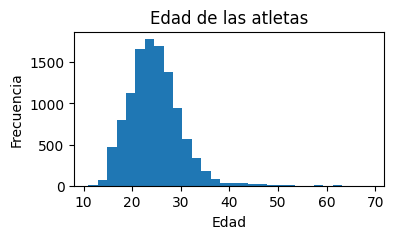

In [ ]:
mpl.style.use('default')

fig, ax = plt.subplots(figsize=(4,2))
ax.hist(x= df_M_1.Age, bins=30, density=False, orientation='vertical')
ax.set_xlabel('Edad')
ax.set_ylabel('Frecuencia')
ax.set_title('Edad de las atletas')

plt.show()

*Vemos que la media de las medallistas está alrededor de los 24 años.*

**Se analiza a continuación la distribución de la Edad de las medallistas según el deporte buscado depurar la disparidad de condiciones que requiere cada disciplina.**

In [ ]:
edad = {edad: np.array(df_M_1['Age']) for edad, df_M_1 in df_M_1.groupby('Sport')}

In [ ]:
fig = ridgeplot(samples=edad.values(),bandwidth = 4, colorscale="magma", colormode='index', labels = edad.keys(), coloralpha =.5)
fig.update_layout(title = 'Distribución de edades por deporte', 
                  height=1100,
                  width=750,
                 yaxis_title="Deporte",
                 xaxis_title="Edad")
fig.show()

*Se visualiza que para algunas discplinas como Buceo (diving), Gimnasia (gymnastics), Natación (swimming) y Skating las atletas obtienen medallas a mas corta edad. Vemos los parámetros estadísticos.*

In [ ]:
df_M_1.Age.describe() # Valores Estadísticos

count    11253.000000
mean        24.517107
std          5.283603
min         11.000000
25%         21.000000
50%         24.000000
75%         28.000000
max         69.000000
Name: Age, dtype: float64

**Se revisan a continuación los valores atípicos de Edad entre las ateltas que han obtenido medallas.**

In [ ]:
atipicos_edad = find_outliers_IQR(df_M_1, "Age")
atipicos_edad

ID                                               Name Sex   Age  \
1756       975  Anna Mrtha Vilhelmina Adlerstrhle (von Oelreich-)   F  39.0   
9417      5167                    Kristin Ann Armstrong (-Savola)   F  42.0   
10482     5724                                rad Suleyman Aumova   F  46.0   
13008     7075                                      Glenys Bakker   F  43.0   
15264     8240  Martina Maria Anna Antonia "Tineke" Bartels-de...   F  41.0   
...        ...                                                ...  ..   ...   
259140  129726                              Isabelle Regina Werth   F  47.0   
260528  130381                      Doreen Viola Wilber (Hansen-)   F  42.0   
262865  131533                           Emily Woodruff (Smiley-)   F  58.0   
262876  131539                                        Doris Woods   F  58.0   
270970  135501          Ellina Aleksandrovna Zvereva (Kisheyeva-)   F  39.0   

        Height  ...  Season            City          Sport  \
1756     187.0  ...  Summer          London         Tennis   
9417     173.0  ...  Summer  Rio de Janeiro        Cycling   
10482    158.0  ...  Summer          Athina       Shooting   
13008    170.0  ...  Winter          Torino        Curling   
15264    177.0  ...  Summer       Barcelona  Equestrianism   
...        ...  ...     ...             ...            ...   
259140   169.0  ...  Summer  Rio de Janeiro  Equestrianism   
260528   167.0  ...  Summer          Munich        Archery   
262865   169.0  ...  Summer       St. Louis        Archery   
262876   169.0  ...  Summer       Amsterdam     Gymnastics   
270970   183.0  ...  Summer          Sydney      Athletics   

                                              Event   Medal  
1756         Tennis Women's Singles, Covered Courts  Bronze  
9417          Cycling Women's Individual Time Trial    Gold  
10482   Shooting Women's Sporting Pistol, 25 metres  Bronze  
13008                       Curling Women's Curling  Bronze  
15264            Equestrianism Mixed Dressage, Team  Silver  
...                                             ...     ...  
259140           Equestrianism Mixed Dressage, Team    Gold  
260528                   Archery Women's Individual    Gold  
262865                   Archery Women's Team Round    Gold  
262876           Gymnastics Women's Team All-Around  Bronze  
270970               Athletics Women's Discus Throw    Gold  

[145 rows x 15 columns]

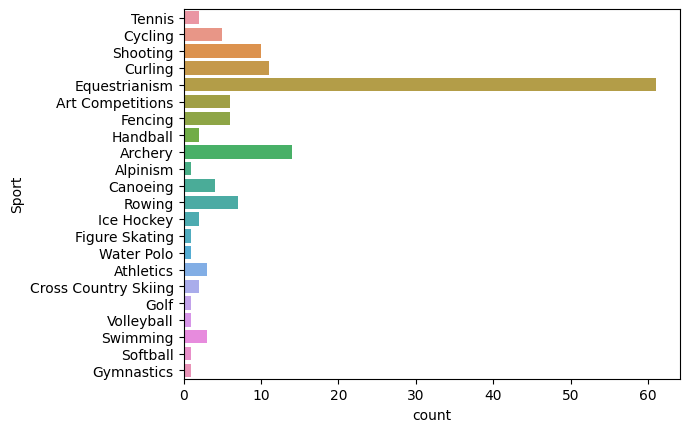

In [ ]:
sns.countplot(data=atipicos_edad, y='Sport')


*Se visualiza que en Equitación, Tiro, Curling y Arquería las atletas han logrado medallas en edades más avanzadas. Veamos el mímino y máximo de edades atípicas.*

In [ ]:
min(atipicos_edad.Age)

39.0

In [ ]:
max(atipicos_edad.Age)

69.0

**2 -  Peso de las atletas** ⚖

**Se analiza ahora el comportamiento de la varable Peso de las atletas medallistas.**

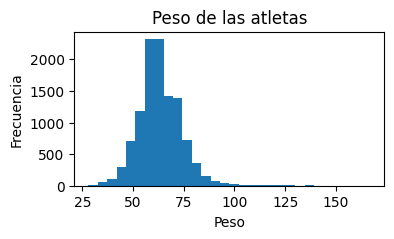

In [ ]:
mpl.style.use('default')

fig, ax = plt.subplots(figsize=(4,2))
ax.hist(x= df_M_1.Weight, bins=30, density=False, orientation='vertical')
ax.set_xlabel('Peso')
ax.set_ylabel('Frecuencia')
ax.set_title('Peso de las atletas')

plt.show()

*Vemos que lel Peso parece tener una distribución normal, con un promedio alrededor de los 63 kilos.*

**Vemos a continuación cómo se comporta la variable Peso para cada Deporte**

In [ ]:
peso = {peso: np.array(df_M_1['Weight']) for peso, df_M_1 in df_M_1.groupby('Sport')}

In [ ]:
fig = ridgeplot(samples=peso.values(),bandwidth = 4, colorscale="magma", colormode='index', labels = peso.keys(), coloralpha =.5)
fig.update_layout(title = 'Distribución de peso por deporte', 
                  height=1100,
                  width=750,
                 yaxis_title="Deporte",
                 xaxis_title="Peso")
fig.show()

*Vemos que para Gimnasia, Buceo, Patinaje Artístico y Gimnasia Rítmica las distribuciones de la consecución de preseas evidencian un menor peso que en el resto de las disciplinas. Veamos los datos estadísticos.*

In [ ]:
df_M_1.Weight.describe() # Valores Estadísticos

count    11251.000000
mean        63.325482
std         10.758728
min         28.000000
25%         57.000000
50%         63.000000
75%         70.000000
max        167.000000
Name: Weight, dtype: float64

**Los atípicos de Peso son los siguientes:**

In [ ]:
atipicos_peso = find_outliers_IQR(df_M_1, "Weight")
atipicos_peso

ID                                       Name Sex   Age  Height  \
1527       846       Valerie Kasanita Adams-Vili (-Price)   F  23.0   193.0   
1528       846       Valerie Kasanita Adams-Vili (-Price)   F  27.0   193.0   
1529       846       Valerie Kasanita Adams-Vili (-Price)   F  31.0   193.0   
4067      2342               Nely Carla Alberto Francisca   F  29.0   179.0   
6557      3672                                milie Andol   F  28.0   170.0   
...        ...                                        ...  ..   ...     ...   
269541  134872                             Zhuang Xiaoyan   F  23.0   173.0   
270182  135165    Kimberley Lyn "Kim" Zmeskal (-Burdette)   F  16.0   139.0   
270588  135331                 Olha Valentynivna Zubareva   F  22.0   182.0   
270969  135501  Ellina Aleksandrovna Zvereva (Kisheyeva-)   F  35.0   183.0   
270970  135501  Ellina Aleksandrovna Zvereva (Kisheyeva-)   F  39.0   183.0   

        ...  Season            City       Sport  \
1527    ...  Summer         Beijing   Athletics   
1528    ...  Summer          London   Athletics   
1529    ...  Summer  Rio de Janeiro   Athletics   
4067    ...  Summer          London    Handball   
6557    ...  Summer  Rio de Janeiro        Judo   
...     ...     ...             ...         ...   
269541  ...  Summer       Barcelona        Judo   
270182  ...  Summer       Barcelona  Gymnastics   
270588  ...  Summer          Moskva    Handball   
270969  ...  Summer         Atlanta   Athletics   
270970  ...  Summer          Sydney   Athletics   

                                     Event   Medal  
1527            Athletics Women's Shot Put    Gold  
1528            Athletics Women's Shot Put    Gold  
1529            Athletics Women's Shot Put  Silver  
4067             Handball Women's Handball  Bronze  
6557              Judo Women's Heavyweight    Gold  
...                                    ...     ...  
269541            Judo Women's Heavyweight    Gold  
270182  Gymnastics Women's Team All-Around  Bronze  
270588           Handball Women's Handball    Gold  
270969      Athletics Women's Discus Throw  Bronze  
270970      Athletics Women's Discus Throw    Gold  

[246 rows x 15 columns]

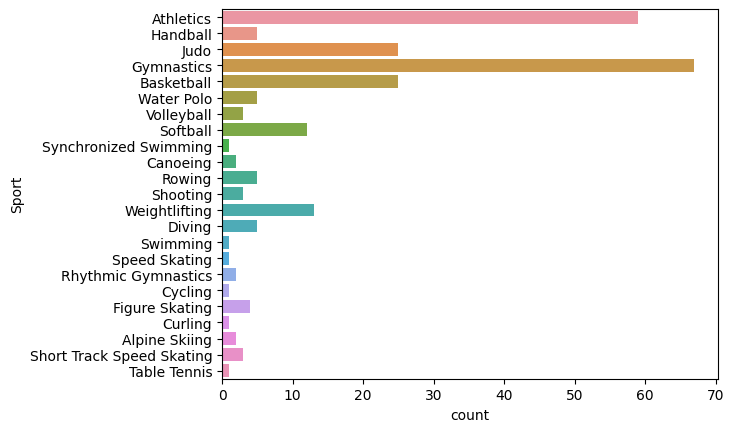

In [ ]:
sns.countplot(data=atipicos_peso, y='Sport')

*Se visualiza que en Atletismo como en Gimnasia se presentan mayor cantidad de registros con Pesos atípicos. Básquet, Judo y Levantamiento de Pesas también muestran ese comportamiento. Vemos los mínimos y máximos del Peso de las atletas medallistas.* 

In [ ]:
min(atipicos_peso.Weight)

28.0

In [ ]:
max(atipicos_peso.Weight)

167.0

**3 - Altura de las atletas** 👠

**Por último analizamos la Altura de las ateltas en la consecución general de medallas y en la distribución según el Deporte.**

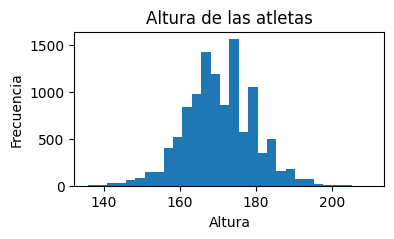

In [ ]:
mpl.style.use('default')

fig, ax = plt.subplots(figsize=(4,2))
ax.hist(x= df_M_1.Height, bins=30, density=False, orientation='vertical')
ax.set_xlabel('Altura')
ax.set_ylabel('Frecuencia')
ax.set_title('Altura de las atletas')

plt.show()

*La altura parece tener una distribución semejante a la normal pero con picos sobresalientes para las atletas medallistas en general.*

**Veamos cómo se distribuyen las alturas según cada deporte.**

In [ ]:
altura = {altura: np.array(df_M_1['Height']) for altura, df_M_1 in df_M_1.groupby('Sport')}

In [ ]:
fig = ridgeplot(samples=altura.values(),bandwidth = 4, colorscale="magma", colormode='index', labels = altura.keys(), coloralpha =.5)
fig.update_layout(title = 'Distribución de altura por deporte', 
                  height=1100,
                  width=750,
                 yaxis_title="Deporte",
                 xaxis_title="Altura")
fig.show()

*Nuevamente la Gimnasia y el Buceo tiene una distribución emplazada en menores valores de Altura. Del otro lado el Básquet tiene el comportamiento opuesto, lo mismo que el Vóley pero en menor medida. Vemos las estadísticas.*

In [ ]:
df_M_1.Height.describe() # Valores Estadísticos

count    11253.000000
mean       170.523683
std          9.018215
min        136.000000
25%        165.000000
50%        170.000000
75%        176.000000
max        210.000000
Name: Height, dtype: float64

**Revisamos los atípicos de la Altura de las medallistas.**

In [ ]:
atipicos_altura = find_outliers_IQR(df_M_1, "Height")
atipicos_altura

ID                                     Name Sex   Age  Height  \
1089       610                      Ginko Abukawa-Chiba   F  26.0   148.0   
1527       846     Valerie Kasanita Adams-Vili (-Price)   F  23.0   193.0   
1528       846     Valerie Kasanita Adams-Vili (-Price)   F  27.0   193.0   
1529       846     Valerie Kasanita Adams-Vili (-Price)   F  31.0   193.0   
2005      1109                 Lavinia Agache (-Carney)   F  16.0   148.0   
...        ...                                      ...  ..   ...     ...   
269112  134659                              Zhao Ruirui   F  26.0   196.0   
269244  134728                             Zheng Haixia   F  17.0   204.0   
269246  134728                             Zheng Haixia   F  25.0   204.0   
269511  134857                                 Zhu Ting   F  21.0   198.0   
270182  135165  Kimberley Lyn "Kim" Zmeskal (-Burdette)   F  16.0   139.0   

        ...  Season            City       Sport  \
1089    ...  Summer           Tokyo  Gymnastics   
1527    ...  Summer         Beijing   Athletics   
1528    ...  Summer          London   Athletics   
1529    ...  Summer  Rio de Janeiro   Athletics   
2005    ...  Summer     Los Angeles  Gymnastics   
...     ...     ...             ...         ...   
269112  ...  Summer         Beijing  Volleyball   
269244  ...  Summer     Los Angeles  Basketball   
269246  ...  Summer       Barcelona  Basketball   
269511  ...  Summer  Rio de Janeiro  Volleyball   
270182  ...  Summer       Barcelona  Gymnastics   

                                     Event   Medal  
1089    Gymnastics Women's Team All-Around  Bronze  
1527            Athletics Women's Shot Put    Gold  
1528            Athletics Women's Shot Put    Gold  
1529            Athletics Women's Shot Put  Silver  
2005    Gymnastics Women's Team All-Around    Gold  
...                                    ...     ...  
269112       Volleyball Women's Volleyball  Bronze  
269244       Basketball Women's Basketball  Bronze  
269246       Basketball Women's Basketball  Silver  
269511       Volleyball Women's Volleyball    Gold  
270182  Gymnastics Women's Team All-Around  Bronze  

[262 rows x 15 columns]

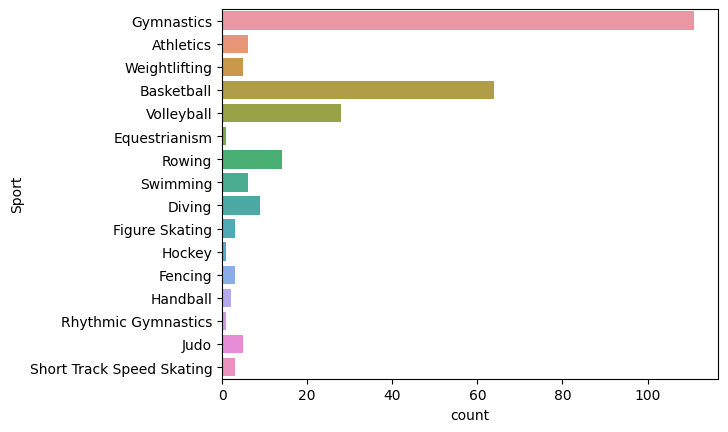

In [ ]:
sns.countplot(data=atipicos_altura, y='Sport')

*Gimnasia, Básquet y Vóley presentan los valores atípicos en la Altura de las medallistas. Veamos los valores mínimo y máximo.*

In [ ]:
min(atipicos_altura.Height)

136.0

In [ ]:
max(atipicos_altura.Height)

210.0

**Conclusiones** ✅


**Se puede inferir que para ciertas disciplinas como Gimnasia, Buceo, Gimnasia rítmica, Vóley, Básquet entre otros,  las condiciones de Edad, Altura y Peso parecen ser mas determinantes y sobresalientes en la consecución de medallas que para otras disciplinas.**

**Se iniciará la aplicación del modelo en estas disciplinas para luego aplicarlo en otras donde estas característias resultan más típicas.**

*06/10/2022*

*Claudia Beatriz Perez Lorenzo*